In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, Reshape, Conv2DTranspose
from tensorflow.nn import leaky_relu, relu, softmax, sigmoid
import numpy as np
import matplotlib.pyplot as plt

In [2]:
generator = Sequential()

generator.add(Dense(128*7*7, input_dim=100, activation=relu))
generator.add(Reshape((7, 7, 128)))

generator.add(Conv2DTranspose(128, (3,3), strides=(2,2), padding="same", activation=relu))
generator.add(Conv2DTranspose(128, (3,3), strides=(2,2), padding="same", activation=relu))

generator.add(Conv2D(1, (3,3), padding="same", activation=sigmoid))

In [3]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 1)         1153      
Total params: 929,793
Trainable params: 929,793
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train = np.random.rand(25,100) # for 25 images with 100 latent dims

In [10]:
pred = generator.predict(x_train)

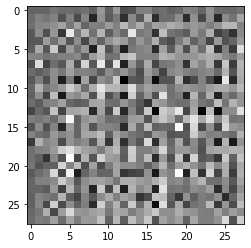

In [15]:
plt.imshow(pred[0], cmap="gray")

In [16]:
generator.save("generator.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: generator.model/assets
